# Datasets

In [2]:
%matplotlib inline
import xml.etree.ElementTree
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import polygon

In [3]:
# ground truth to segment image
e = xml.etree.ElementTree.parse('./testdata/d-287_mathias.seuret@unifr.ch.xml').getroot()

In [5]:
page = e.findall('Page')[0]
img = np.zeros((int(page.attrib['imageHeight']), int(page.attrib['imageWidth'])))

In [6]:
int(page.attrib['imageWidth'])

2000

In [98]:
labels = {'page': 0, 'text': 1, 'textline': 2, 'comment': 3, 'decoration': 4}

In [45]:
region = page.findall('TextRegion')[0]
region.attrib

{'comments': '', 'custom': '0', 'id': '2085497257', 'type': 'textline'}

In [99]:
for region in page.findall('TextRegion'):
#     region.attrib
    area  = np.array([(int(point.attrib['x']), int(point.attrib['y'])) for point in region[0].getchildren()])
    rr, cc = polygon(area[:,1], area[:,0], img.shape)
    img[rr,cc] = labels[region.attrib['type']]

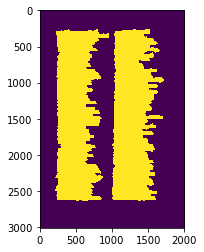

In [100]:
plt.imshow(img[:,:])

In [72]:
area.shape

(26, 2)

In [92]:
area[0,:]

array([379, 325])

In [8]:
page.